1. Impoting Dependencies :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

2. Data Collcetion and Analysis:

A- Loading dataset :

In [3]:
data_car = pd.read_csv("C:/Machine_learning Python/projets/CarPrice/car data.csv")

B- View the data (head)

In [4]:
data_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


C- type of  the data (head)

In [5]:
type(data_car)

pandas.core.frame.DataFrame

D-Number of row & columns:

In [6]:
data_car.shape

(301, 9)

E- Information about the data:

In [7]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


2. Statisctical measures :

A- General Statistic:

In [8]:
data_car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


B- Number of missing value in each column;

In [9]:
data_car.isnull().sum()
#Any missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

3. Label Encoding:

A- Distribution of categorical data:

In [12]:
print(data_car.Fuel_Type.value_counts())
print(data_car.Seller_Type.value_counts())
print(data_car.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


B- Encoding the categorical Data:

In [13]:
data_car.replace({"Fuel_Type": {'Petrol':0,'Diesel':1, 'CNG': 2 }}, inplace=True)
data_car.replace({"Seller_Type": {'Dealer':0,'Individual':1}}, inplace=True)
data_car.replace({"Transmission": {'Manual':0,'Automatic':1}}, inplace=True)
data_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


C- Review the type:

In [14]:
print(data_car.Fuel_Type.value_counts())
print(data_car.Seller_Type.value_counts())
print(data_car.Transmission.value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
Seller_Type
0    195
1    106
Name: count, dtype: int64
Transmission
0    261
1     40
Name: count, dtype: int64


5. Train test split:

A- Separating a data & label

In [15]:
X = data_car.drop(columns=["Car_Name","Selling_Price"], axis= 1)
Y = data_car["Selling_Price"]
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

B- Test Split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [18]:
print(X.shape,X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


6. Training the model (Linear Regression):

A- Loading the model

In [19]:
linear_model = LinearRegression()

B- Training the model:

In [20]:
linear_model.fit(X_train, Y_train)

LinearRegression()

7. Model Evaluation:

A- Error score of training data:

In [23]:
X_train_prediction = linear_model.predict(X_train)
error_score = metrics.r2_score(Y_train, X_train_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493708


B- Visualisation of the actual & predicted prices:

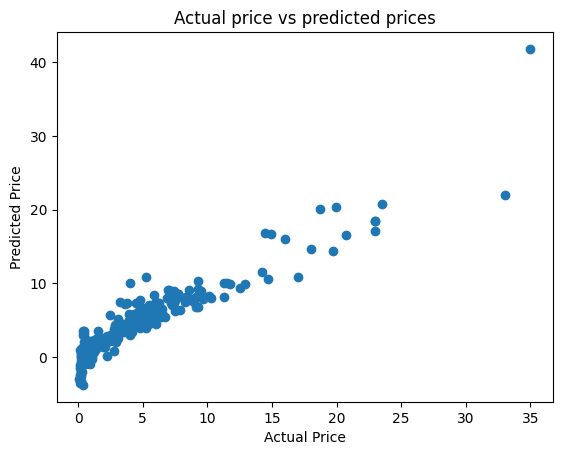

In [31]:
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted prices")
plt.show()

C- Error score of training data:

In [32]:
X_train_predictionTest = linear_model.predict(X_test)
error_scoreTest = metrics.r2_score(Y_test, X_train_predictionTest)
print("R squared Error : ", error_scoreTest)

R squared Error :  0.8365766715026374


D- Visualisation of the actual & predicted prices:

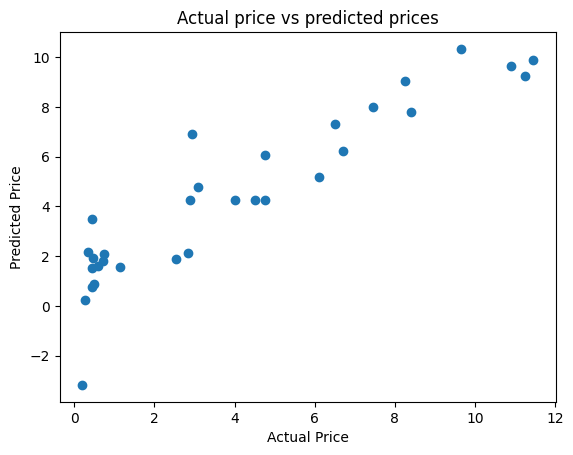

In [33]:
plt.scatter(Y_test, X_train_predictionTest)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted prices")
plt.show()

8. Training the model (Lasso Regression):

A- Loading the model:

In [34]:
Lasso_Model = Lasso()

B- Training the model:

In [35]:
Lasso_Model.fit(X_train,Y_train)

Lasso()

9. Model Evaluation:

A- Error score of training data:

In [36]:
X_train_prediction = Lasso_Model.predict(X_train)
error_score = metrics.r2_score(Y_train, X_train_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


B- Visualisation of the actual & predicted prices:

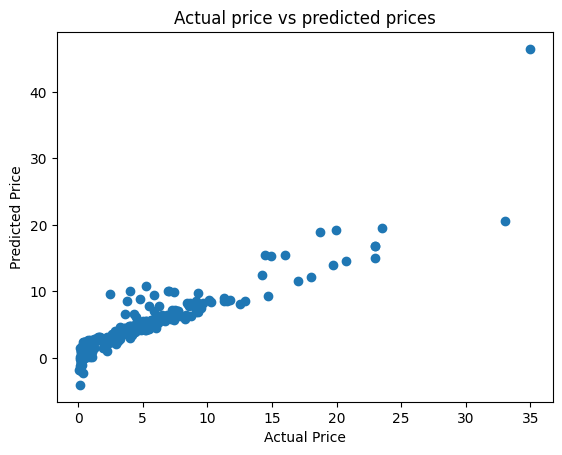

In [38]:
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted prices")
plt.show()

C- Error score of training data:

In [40]:
X_train_predictionTest = Lasso_Model.predict(X_test)
error_scoreTest = metrics.r2_score(Y_test, X_train_predictionTest)
print("R squared Error : ", error_scoreTest)

R squared Error :  0.8709167941173195


D- Visualisation of the actual & predicted prices:

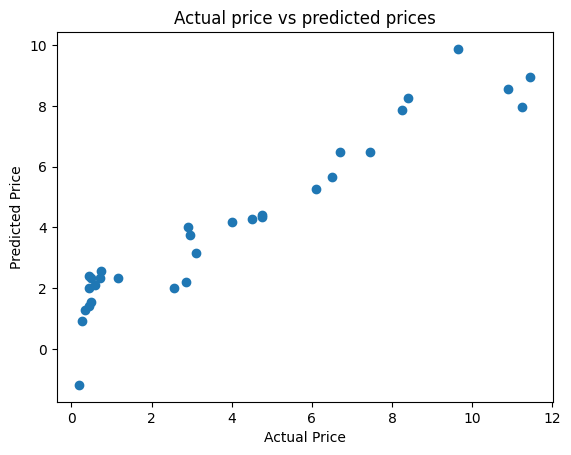

In [41]:
plt.scatter(Y_test, X_train_predictionTest)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted prices")
plt.show()